In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [18]:
rd = pd.read_csv('russian_demography.csv')
# npg = natural population growth by 1000 people
# birth_rate = sort number of births by 1000 people
# death_rate = sort number of deaths by 1000 people
# gdw = sort general demographic weight (how many people of non-woking age account for 100 people of working age)
# urbanization = sort of urban population



In [118]:
rd.head(100)

,year,region,npg,birth_rate,death_rate,gdw,urbanization
0,1990,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,1990,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,1990,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,1990,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,1990,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
...,...,...,...,...,...,...,...
95,1991,Volgograd Oblast,0.3,11.9,11.6,78.18,75.80
96,1991,Vologda Oblast,-0.1,11.9,12.0,82.95,65.90
97,1991,Voronezh Oblast,-3.7,10.5,14.2,84.82,61.22
98,1991,Republic of Dagestan,18.6,24.9,6.3,95.05,43.97


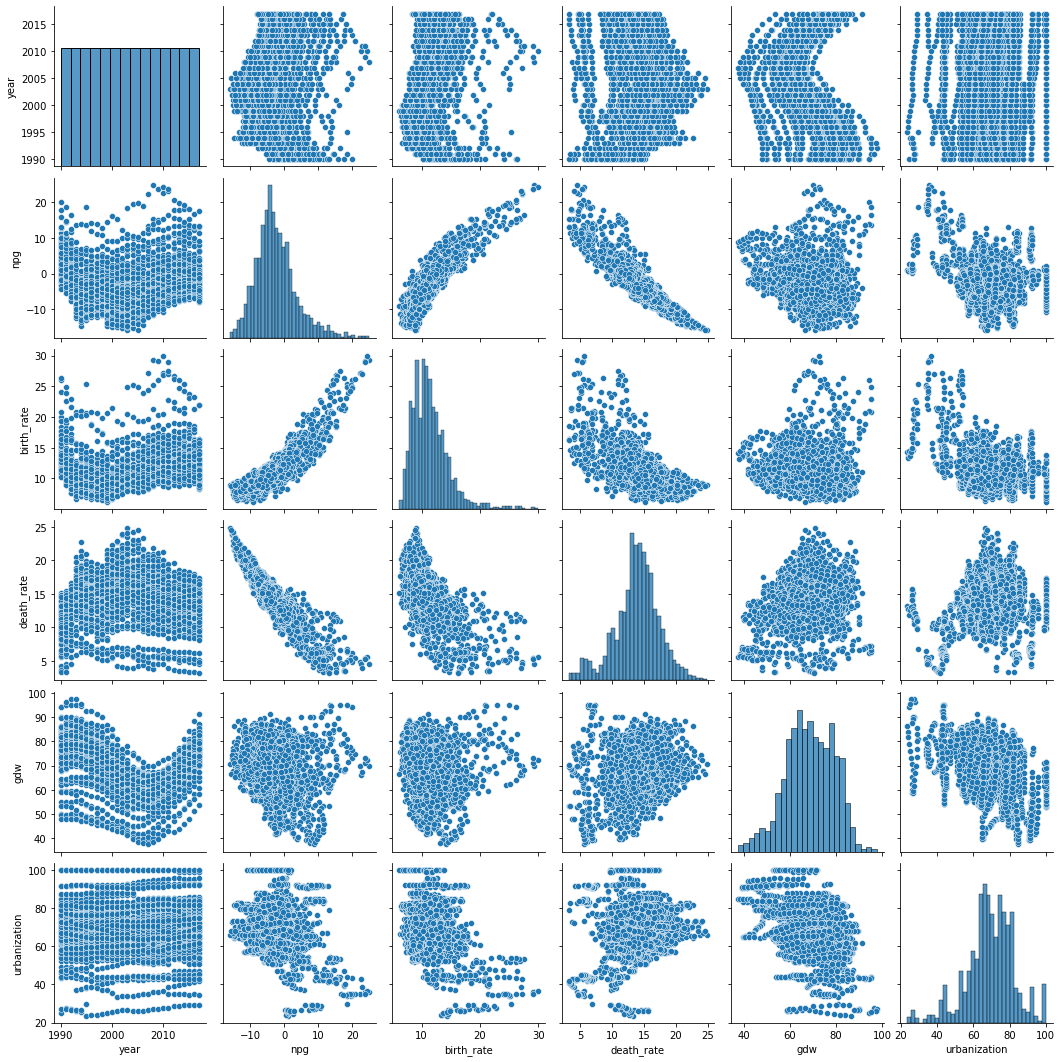

In [17]:
sns.pairplot(rd)

In [76]:
# cгруппируем данные по годам, чтобы отследить динамику в целом по стране
ls = rd.groupby('year').sum()
ls.head(50)

,npg,birth_rate,death_rate,gdw,urbanization
year,,,,,
1990,312.6,1177.1,864.5,6320.78,5721.84
1991,180.1,1063.7,883.6,6365.26,5744.59
1992,-8.9,941.3,950.2,6393.58,5740.10
1993,-306.7,813.8,1120.5,6408.15,5693.90
1994,-387.3,828.5,1215.8,6365.41,5687.67
1995,-354.2,821.8,1176.0,6289.92,5692.92
1996,-342.3,783.8,1126.1,6236.05,5709.55
1997,-333.5,757.7,1091.2,6167.39,5711.21
1998,-300.3,778.0,1078.3,6058.63,5717.02


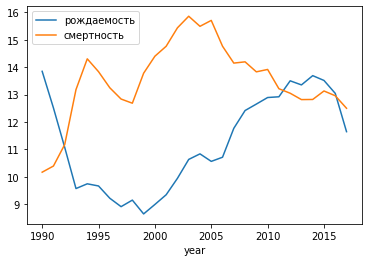

In [205]:
# так как всего 85 регионов, то чтобы усреднить данныем делим на 85
sls = ls['birth_rate']/85
pls = ls['death_rate']/85
sls.plot(label = 'рождаемость')
pls.plot(label = 'смертность')
plt.legend(loc='upper left')

<AxesSubplot:title={'center':'Зависимость естественного прироста населения от рождаемости'}, xlabel='Рождаемость', ylabel='Естественный прирост населени'>

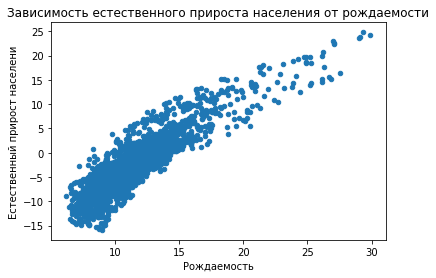

In [216]:
rd.plot(kind = 'scatter', x = 'birth_rate', y = 'npg',
       title = 'Зависимость естественного прироста населения от рождаемости',
       xlabel = 'Рождаемость',
       ylabel = 'Естественный прирост населени')
# занимательный график. прослеживается экспоненциальная зависимость.
# Планете вовсе не грозит перенаселение, как нас этим пугал Танос из Мстителей

In [220]:
top_years = rd.drop('year',1)
trep = top_years.groupby('region').sum()/28
trep.head() #скомпануем данные по всем регионам

,npg,birth_rate,death_rate,gdw,urbanization
region,,,,,
Altai Krai,-3.403571,10.882143,14.342857,70.006071,54.230714
Altai Republic,4.853571,17.396429,12.592857,74.703571,26.740000
Amur Oblast,-1.550000,12.264286,13.896429,63.717857,66.728929
Arkhangelsk Oblast,-3.600000,10.839286,14.489286,66.476786,75.016786
Astrakhan Oblast,-0.882143,12.421429,13.278571,69.259643,67.389643


<AxesSubplot:title={'center':'топ 15 урбанизированных регионо'}, xlabel='Регион', ylabel='индекс'>

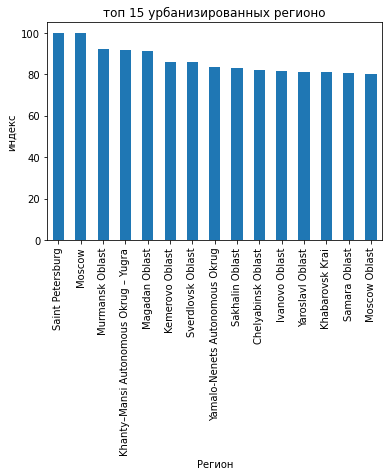

In [230]:
trep['urbanization'].sort_values(ascending=False).head(15).plot(kind = 'bar',
                                                                title='топ 15 урбанизированных регионо',
                                                               xlabel = 'Регион',
                                                               ylabel='индекс')

In [233]:
top_years.head(50)

,region,npg,birth_rate,death_rate,gdw,urbanization
0,Republic of Adygea,1.9,14.2,12.3,84.66,52.42
1,Altai Krai,1.8,12.9,11.1,80.24,58.07
2,Amur Oblast,7.6,16.2,8.6,69.55,68.37
3,Arkhangelsk Oblast,3.7,13.5,9.8,73.26,73.63
4,Astrakhan Oblast,4.7,15.1,10.4,77.05,68.01
5,Republic of Bashkortostan,6.5,16.2,9.7,80.53,64.22
6,Belgorod Oblast,0.0,12.9,12.9,84.17,63.26
7,Bryansk Oblast,0.1,13.0,12.9,86.48,67.49
8,Republic of Buryatia,9.2,18.3,9.1,79.47,62.16
9,Vladimir Oblast,-0.4,12.1,12.5,77.78,79.31


<AxesSubplot:title={'center':'Распределение трудоспособного населения по стране сколько неработающих приходится на 100 работающих'}>

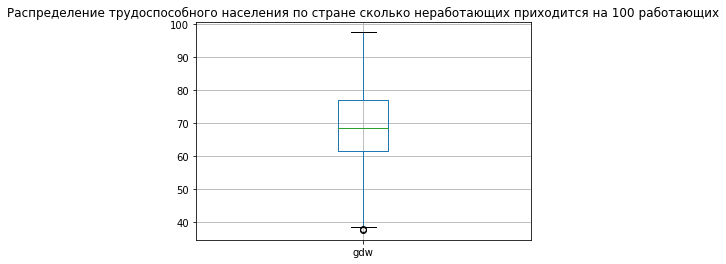

In [241]:
top_years['gdw'].plot(kind = 'box',
                      title = 'Распределение трудоспособного населения по стране сколько неработающих приходится на 100 работающих',
                      xlabel = 'индекс',
                      grid = True)



